In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Trying out this notebook thing... should be good for interative plotting

In [2]:
sig = open('sig-input/german-task1-train', 'r')
uni = open('unimorph/deu/deu', 'r')

In [3]:
def sig_extract(sig_lines):
    corpus_feats = []
    for line in sig_lines:
        line = line.split()
        feats = line[1]
        feats = feats.split(',')
        feats = [f.split('=')[1] for f in feats]
        corpus_feats.append(feats)
    return corpus_feats        

In [4]:
def uni_extract(uni_lines):
    corpus_feats = []
    for line in uni_lines:
        line = line.strip().split('\t')
        feats = line[2].split(';')
        corpus_feats.append(feats)
    return corpus_feats

In [5]:
sig_feats = sig_extract(sig)

In [6]:
uni_feats = uni_extract(uni)

In [7]:
def bag(feats, array):
    for f in feats:
        array += f
    return array

In [8]:
def bag_by_pos(feats, array):
    for f in feats:
        pos = f[0]
        for feat in f[1:]:
            array.append(' '.join([pos, feat]))
    return array

In [9]:
def full_joint(feats, array):
    for f in feats:
        array.append(' '.join(f))
    return array

In [29]:
sig_bag = bag(sig_feats, [])
uni_bag = bag(uni_feats, [])


In [30]:
sig_by_pos = bag_by_pos(sig_feats, [])
uni_by_pos = bag_by_pos(uni_feats, [])

In [31]:
sig_full_joint = full_joint(sig_feats, [])
uni_full_joint = full_joint(uni_feats, [])

In [15]:
sig_series = pd.Series(sig_bag)
sig_series.describe()

count     55841
unique       25
top          SG
freq       8176
dtype: object

In [16]:
uni_series = pd.Series(uni_bag)
uni_series.describe()

count     677486
unique        18
top            N
freq       93331
dtype: object

In [32]:
sig_bag = dict(pd.value_counts(sig_bag))
uni_bag = dict(pd.value_counts(uni_bag))
sig_by_pos = dict(pd.value_counts(sig_by_pos))
uni_by_pos = dict(pd.value_counts(uni_by_pos))
sig_full_joint = dict(pd.value_counts(sig_full_joint))
uni_full_joint = dict(pd.value_counts(uni_full_joint))

In [60]:
def plot_it(count_hash):
    keys = count_hash.keys()
    vals = count_hash.values()

    plt.bar(keys, np.divide(list(vals), sum(vals)), label="Real distribution")

    plt.ylim(0,max(np.divide(list(vals), sum(vals))) + 0.05)
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.xticks(list(sorted(keys)), rotation=90)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.)
    

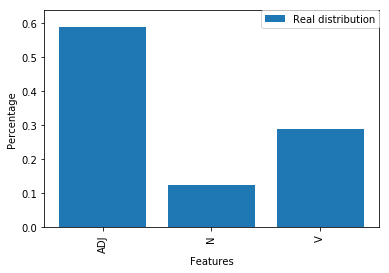

In [61]:
plot_it({k: sig_bag[k] for k in ('N', 'V', 'ADJ')})
#plot_it(sig_bag)

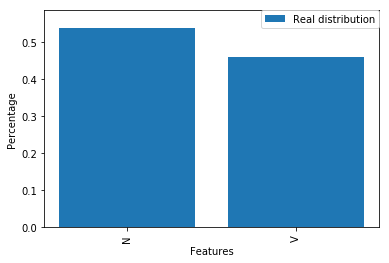

In [62]:
plot_it({k: uni_bag[k] for k in ('N', 'V')})
# plot_it(uni_bag)

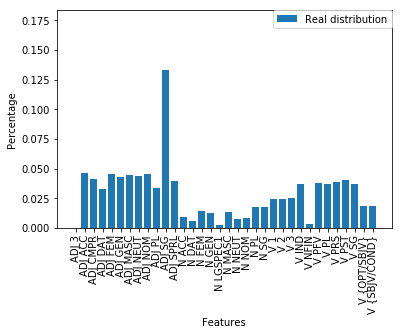

In [63]:
plot_it(sig_by_pos)

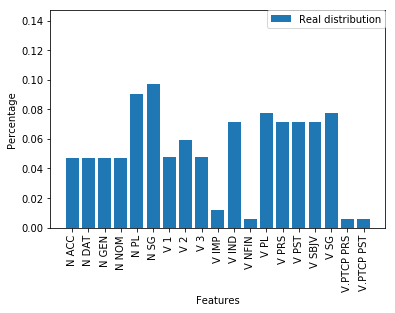

In [64]:
plot_it(uni_by_pos)

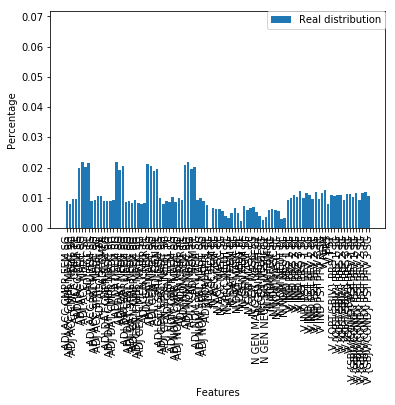

In [65]:
plot_it(sig_full_joint)

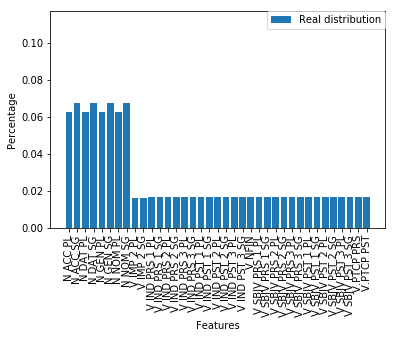

In [66]:
plot_it(uni_full_joint)